In [0]:
import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
def Load_Img(Img_Path='YM.SU3.60.tiff'):
  
  img = Image.open(Img_Path)
  img.show()
  return img

In [0]:
def Crop_Img(Img, Dim_Tuple=(70,90,184,230)):
  
  cropped_img = Img.crop(Dim_Tuple)
  imgarray = np.array(cropped_img)

  print(imgarray.shape)
  print(imgarray)
  
  return imgarray

In [0]:
def Display_Img(imgarray):
  img = Image.fromarray(imgarray)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
def mean(Img, i,j, N):
  
  a=int((N-1)/2)
  u=0
  
  valid_cnt = 0
  for k in range(-a,a):
    for h in range(-a,a):
      if((k+i)>0 and (k+i)<Img.shape[0] and (h+j)>0 and (h+j)<Img.shape[1]):
        u=u+Img[k+i][h+j]
        valid_cnt = valid_cnt + 1

  u=np.float128(u/(valid_cnt*valid_cnt))
  return u

In [0]:
def st_dev(Img, i,j, N):
  
  a=int((N-1)/2)
  sd=0
    
  valid_cnt = 0
  for k in range(-a,a):
    for h in range(-a,a):
      if((k+i)>0 and (k+i)<Img.shape[0] and (h+j)>0 and (h+j)<Img.shape[1]):
        m=mean(Img, i,j, N)
        sd=sd+np.square(Img[k+i][h+j]-m)
        valid_cnt = valid_cnt + 1
        
  sd=np.float128(sd/(valid_cnt*valid_cnt))
  sd=np.sqrt(sd)
  
  return sd

In [0]:
def normalize(Img, N=11):
  
  Normalized_Img = Img
  
  for i in range(0,Img.shape[0]):
    for j in range(0,Img.shape[1]):
    
      print("index",i,j)
      m=mean(Img, i,j, N) 
      sd=st_dev(Img, i,j, N)
      print("mean std",m, sd)
      
      Normalized_Img[i][j]=np.float128((Img[i][j]-m)/(6*sd))
      
  return Normalized_Img

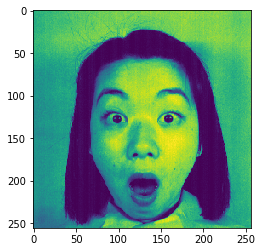

(140, 114)
[[  9  17  17 ... 146 155 124]
 [  3  11  21 ... 133 156 131]
 [  9  12  28 ... 136 153 130]
 ...
 [  3   2   7 ... 170 171 175]
 [  6   2   4 ... 150 171 169]
 [  3   2   3 ... 170 173 170]]


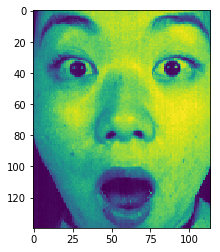

In [51]:
Img = Load_Img('YM.SU3.60.tiff')

imgplot = plt.imshow(Img)
plt.show()

Cropped_Img = Crop_Img(Img)
Display_Img(Cropped_Img)

In [52]:
Normalized_Img = normalize(Cropped_Img, 11)

index 0 0
mean std 2.76171875 12.097579034467112034
index 0 1
mean std 2.7000000000000001776 13.278347035681813323
index 0 2
mean std 2.625 14.152282832638697657
index 0 3
mean std 2.5382653061224491609 14.75558101881613563
index 0 4
mean std 2.4482421875 15.1611563626166355725
index 0 5
mean std 2.3549382716049382935 15.407407209903471172
index 0 6
mean std 2.2331249999999998046 15.294740980166699961
index 0 7
mean std 2.4968750000000001776 16.374071426737170067
index 0 8
mean std 2.65625 16.97439434785708341
index 0 9
mean std 2.705000000000000071 17.236230029359668523
index 0 10
mean std 2.7462499999999998579 17.480124973854234454
index 0 11
mean std 2.7406250000000000888 17.496073841108342342
index 0 12
mean std 2.6549999999999998046 17.127556031874483434
index 0 13
mean std 2.5393750000000001599 16.56592843318827163
index 0 14
mean std 2.4087499999999999467 15.841627087804538402
index 0 15
mean std 2.2512500000000001954 14.939267051601376978
index 0 16
mean std 2.12625000000000019

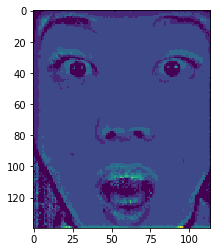

In [53]:
Display_Img(Normalized_Img)

In [54]:
Feature_Detection_Img = normalize(Normalized_Img, 11)

index 0 0
mean std 0.01171875 0.107017170891977219426
index 0 1
mean std 0.017500000000000001665 0.13001081685767534606
index 0 2
mean std 0.020833333333333332177 0.15315216123431213528
index 0 3
mean std 0.022959183673469388959 0.17197913399393330602
index 0 4
mean std 0.0234375 0.17922516097131929345
index 0 5
mean std 0.023919753086419751759 0.19152082388834421143
index 0 6
mean std 0.023124999999999999722 0.18925865341015453819
index 0 7
mean std 0.026874999999999999584 0.20420216793811225358
index 0 8
mean std 0.029374999999999998335 0.2095728775763338134
index 0 9
mean std 0.03125 0.21347432881379437658
index 0 10
mean std 0.034375000000000002776 0.22812553510211214368
index 0 11
mean std 0.036874999999999998057 0.24584438755160753139
index 0 12
mean std 0.038124999999999999167 0.25299072441618289506
index 0 13
mean std 0.038749999999999999722 0.25648472481319428473
index 0 14
mean std 0.040000000000000000833 0.26332489437954779122
index 0 15
mean std 0.040000000000000000833 0.26

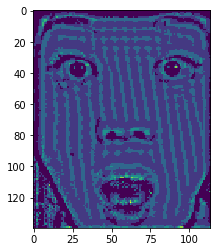

In [55]:
Display_Img(Feature_Detection_Img)